In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from the folder

In [4]:
data = pd.read_csv(r"C:\Users\Sheroy Rohilla\Desktop\covid19_italy_region.csv")

Taking account the initial number of rows and coloumns

In [160]:
data.shape

(6027, 17)

Checking whether null values are there in it or not and that too in which column 

In [161]:
data.isnull().sum()

SNo                             0
Date                            0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [162]:
data = data.dropna(how='any')

Dropping null values from the dataset

In [163]:
data.shape

(4872, 17)

In [164]:
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
1155,1155,2020-04-19T17:00:00,ITA,13,Abruzzo,42.351222,13.398438,317,40,357,1630,1987,34,276,258,2521,22424.0
1156,1156,2020-04-19T17:00:00,ITA,17,Basilicata,40.639471,15.805148,59,8,67,180,247,3,71,24,342,6528.0
1157,1157,2020-04-19T17:00:00,ITA,18,Calabria,38.905976,16.594402,142,6,148,696,844,24,116,75,1035,22234.0
1158,1158,2020-04-19T17:00:00,ITA,15,Campania,40.839566,14.250850,590,61,651,2371,3022,41,703,304,4029,34994.0
1159,1159,2020-04-19T17:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,3166,289,3455,10097,13552,376,5985,3023,22560,88776.0


Converting date into datetime

Removing unnecessary data

In [165]:
req_data = data.copy().drop(['Date','SNo','RegionCode','Country','HospitalizedPatients', 'IntensiveCarePatients', 'HomeConfinement',
                                                                                                     'NewPositiveCases', 'NewPositiveCases', 'TotalHospitalizedPatients',
                                                                                                     'Latitude', 'Longitude'], axis=1).fillna(0)
req_data.index = req_data["RegionName"]
req_data = req_data.drop(['RegionName'], axis=1)

In [166]:
req_data.head()

,CurrentPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
RegionName,,,,,
Abruzzo,1987,276,258,2521,22424.0
Basilicata,247,71,24,342,6528.0
Calabria,844,116,75,1035,22234.0
Campania,3022,703,304,4029,34994.0
Emilia-Romagna,13552,5985,3023,22560,88776.0


# Death

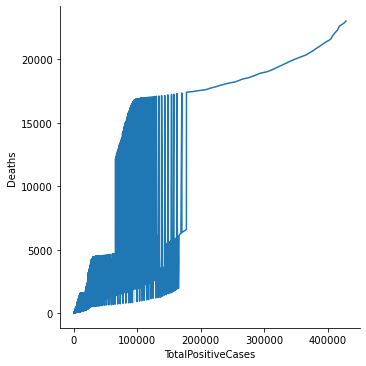

In [167]:
sns.relplot(x = 'TotalPositiveCases',y = 'Deaths',kind = 'line',data = req_data )

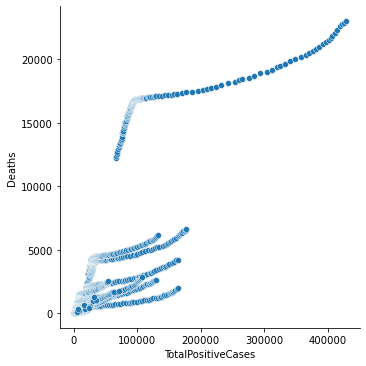

In [168]:
sns.relplot(x = 'TotalPositiveCases',y = 'Deaths',data = req_data)

In [169]:
req_data.shape

(4872, 5)

Finding the best fit line

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [171]:
train = req_data.drop(['CurrentPositiveCases','Recovered','TestsPerformed','Deaths'],axis=1)
test = req_data['Deaths']

In [172]:
X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.7)

In [173]:
regr = LinearRegression()

In [174]:
regr.fit(X_train,y_train)

LinearRegression()

In [175]:
pred = regr.predict(X_test)

In [176]:
print(regr.score(X_test,y_test))

0.5998196654171386


# Recovered

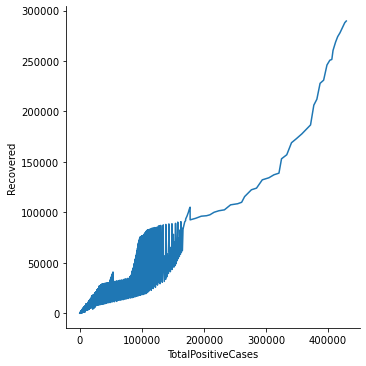

In [177]:
sns.relplot(x = 'TotalPositiveCases',y = 'Recovered',data = req_data,kind='line')

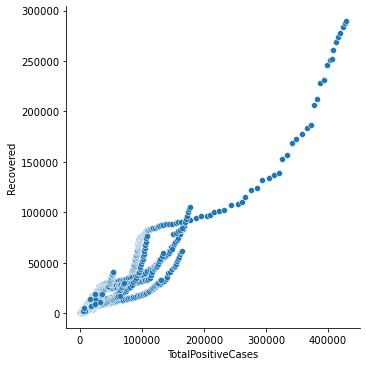

In [178]:
sns.relplot(x = 'TotalPositiveCases',y = 'Recovered',data = req_data)

In [179]:
train1 = req_data.drop(['CurrentPositiveCases','Deaths','TestsPerformed','Recovered'],axis=1)
test1 = req_data['Recovered']

In [180]:
train1.head()

,TotalPositiveCases
RegionName,
Abruzzo,2521
Basilicata,342
Calabria,1035
Campania,4029
Emilia-Romagna,22560


In [181]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(train1,test1,test_size=0.7)

In [182]:
X_train_1

,TotalPositiveCases
RegionName,
Piemonte,31830
Friuli Venezia Giulia,30075
P.A. Bolzano,3003
Molise,534
Sardegna,16096
...,...
Friuli Venezia Giulia,11244
Marche,8143
Toscana,104875


In [183]:
y_train_1

RegionName
Piemonte                 26904
Friuli Venezia Giulia    14949
P.A. Bolzano              2496
Molise                     433
Sardegna                  4972
                         ...  
Friuli Venezia Giulia     5470
Marche                    6210
Toscana                  64632
P.A. Trento               4704
Molise                     675
Name: Recovered, Length: 1461, dtype: int64

In [184]:
regr1 = LinearRegression()

In [185]:
regr1.fit(X_train_1,y_train_1)

LinearRegression()

In [186]:
pred1 = regr1.predict(X_test_1)

In [187]:
print(regr1.score(X_test_1,y_test_1))

0.8896831128093012
